In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
import sklearn.cross_validation as cv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
import seaborn as sn

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train = pd.read_csv('./Urban land cover/training.csv',header=0) #(168,148)
train.shape

(168, 148)

In [3]:
test = pd.read_csv('./Urban land cover/testing.csv',header=0) #(507, 148)
test.head()

class  BrdIndx  Area  Round  Bright  Compact  ShpIndx  Mean_G  Mean_R  \
0  concrete      1.32   131   0.81  222.74     1.66     2.18  192.94  235.11   
1    shadow      1.59   864   0.94   47.56     1.41     1.87   36.82   48.78   
2    shadow      1.41   409   1.00   51.38     1.37     1.53   41.72   51.96   
3      tree      2.58   187   1.91   70.08     3.41     3.11   93.13   55.20   
4   asphalt      2.60   116   2.05   89.57     3.06     3.02   73.17   94.89   

   Mean_NIR   SD_G   SD_R  SD_NIR    LW  GLCM1  Rect  GLCM2  Dens  Assym  \
0    240.15  11.24  11.47   11.24  8.18   0.43  0.78   6.64  0.87   0.99   
1     57.09   8.15   8.02    8.36  3.05   0.43  0.85   6.75  1.81   0.73   
2     60.48   8.11   9.20    9.61  1.94   0.54  0.86   6.51  1.82   0.69   
3     61.92  28.60  15.88   15.09  3.23   0.73  0.50   7.28  1.03   0.89   
4    100.64   5.41   5.20    5.27  2.30   0.43  0.59   6.02  1.23   0.82   

   NDVI  BordLngth    GLCM3  BrdIndx_40  Area_40  Round_40  Bright_40  \
0 -0.10        100  4322.47        1.32      131      0.81     222.74   
1 -0.14        220  3331.33        1.08     1353      0.46      49.12   
2 -0.11        124  2816.16        1.75     1094      1.91      49.05   
3  0.26        170  2442.01        2.86      871      2.22      90.21   
4 -0.13        130  4912.28        4.02      501      2.33     100.69   

   Compact_40  ShpIndx_40  Mean_G_40  Mean_R_40  Mean_NIR_40  SD_G_40  \
0        1.66        2.18     192.94     235.11       240.15    11.24   
1        1.09        1.33      38.29      50.40        58.67     8.84   
2        1.84        1.98      40.06      50.07        57.02    10.54   
3        3.34        3.93     117.16      72.76        80.70    42.07   
4        4.29        4.40      83.66     106.21       112.19    15.39   

   SD_R_40  SD_NIR_40  LW_40  GLCM1_40  Rect_40  GLCM2_40  Dens_40  Assym_40  \
0    11.47      11.24   8.18      0.43     0.78      6.64     0.87      0.99   
1     9.97      10.55   3.70      0.51     0.96      6.96     1.67      0.86   
2    10.81      11.55   2.57      0.49     0.75      6.93     1.49      0.88   
3    27.05      27.38   5.25      0.84     0.51      8.56     0.89      0.95   
4    16.50      16.44   2.24      0.64     0.45      7.28     1.13      0.79   

   NDVI_40  BordLngth_40  GLCM3_40  BrdIndx_60  Area_60  Round_60  Bright_60  \
0    -0.10           100   4322.47        1.19      452      0.49     196.82   
1    -0.14           196   3063.33        1.07     1377      0.46      49.82   
2    -0.11           262   2668.96        2.53     2826      2.00      45.67   
3     0.23           464   1234.84        2.86      871      2.22      90.21   
4    -0.12           394   2574.50        4.59     1367      1.91     113.93   

   Compact_60  ShpIndx_60  Mean_G_60  Mean_R_60  Mean_NIR_60  SD_G_60  \
0        1.27        1.46     169.60     208.71       212.17    18.48   
1        1.07        1.32      38.88      51.21        59.38    10.07   
2        2.85        3.09      38.69      45.68        52.63     9.90   
3        3.34        3.93     117.16      72.76        80.70    42.07   
4        3.07        4.65      98.87     118.98       123.95    25.07   

   SD_R_60  SD_NIR_60  LW_60  GLCM1_60  Rect_60  GLCM2_60  Dens_60  Assym_60  \
0    20.90      22.09   3.47      0.71     0.92      7.44     1.56      0.87   
1    11.89      12.01   3.70      0.52     0.96      7.01     1.69      0.86   
2    10.70      11.01   3.58      0.61     0.59      7.02     1.14      0.93   
3    27.05      27.38   5.25      0.84     0.51      8.56     0.89      0.95   
4    23.28      22.31   1.10      0.77     0.58      8.15     1.63      0.19   

   NDVI_60  BordLngth_60  GLCM3_60  BrdIndx_80  Area_80  Round_80  Bright_80  \
0    -0.10           124   2271.21        3.65     1522      2.70     181.04   
1    -0.14           196   2659.74        1.07     1377      0.46      49.82   
2    -0.08           658   2289.55        2.30     2901      2.00    

In [4]:
# no dulplicate
train.drop_duplicates()
train.shape
train.isnull().sum()

class            0
BrdIndx          0
Area             0
Round            0
Bright           0
Compact          0
ShpIndx          0
Mean_G           0
Mean_R           0
Mean_NIR         0
SD_G             0
SD_R             0
SD_NIR           0
LW               0
GLCM1            0
Rect             0
GLCM2            0
Dens             0
Assym            0
NDVI             0
BordLngth        0
GLCM3            0
BrdIndx_40       0
Area_40          0
Round_40         0
Bright_40        0
Compact_40       0
ShpIndx_40       0
Mean_G_40        0
Mean_R_40        0
Mean_NIR_40      0
SD_G_40          0
SD_R_40          0
SD_NIR_40        0
LW_40            0
GLCM1_40         0
Rect_40          0
GLCM2_40         0
Dens_40          0
Assym_40         0
NDVI_40          0
BordLngth_40     0
GLCM3_40         0
BrdIndx_60       0
Area_60          0
Round_60         0
Bright_60        0
Compact_60       0
ShpIndx_60       0
Mean_G_60        0
Mean_R_60        0
Mean_NIR_60      0
SD_G_60     

## 1.1  Use metadata to differentiate variables
the type of class is ordinal,
others are discrete or continous

In [5]:
train = train.sort_values(['class'])

In [6]:
data = []
for f in train.columns:
    data.append((f, train[f].dtype))

In [7]:
meta = pd.DataFrame(data, columns=['varname', 'dtype'])
meta

varname    dtype
0            class   object
1          BrdIndx  float64
2             Area    int64
3            Round  float64
4           Bright  float64
5          Compact  float64
6          ShpIndx  float64
7           Mean_G  float64
8           Mean_R  float64
9         Mean_NIR  float64
10            SD_G  float64
11            SD_R  float64
12          SD_NIR  float64
13              LW  float64
14           GLCM1  float64
15            Rect  float64
16           GLCM2  float64
17            Dens  float64
18           Assym  float64
19            NDVI  float64
20       BordLngth    int64
21           GLCM3  float64
22      BrdIndx_40  float64
23         Area_40    int64
24        Round_40  float64
25       Bright_40  float64
26      Compact_40  float64
27      ShpIndx_40  float64
28       Mean_G_40  float64
29       Mean_R_40  float64
30     Mean_NIR_40  float64
31         SD_G_40  float64
32         SD_R_40  float64
33       SD_NIR_40  float64
34           LW_40  float64
35        GLCM1_40  float64
36         Rect_40  float64
37        GLCM2_40  float64
38         Dens_40  float64
39        Assym_40  float64
40         NDVI_40  float64
41    BordLngth_40    int64
42        GLCM3_40  float64
43      BrdIndx_60  float64
44         Area_60    int64
45        Round_60  float64
46       Bright_60  float64
47      Compact_60  float64
48      ShpIndx_60  float64
49       Mean_G_60  float64
50       Mean_R_60  float64
51     Mean_NIR_60  float64
52         SD_G_60  float64
53         SD_R_60  float64
54       SD_NIR_60  float64
55           LW_60  float64
56        GLCM1_60  float64
57         Rect_60  float64
58        GLCM2_60  float64
59         Dens_60  float64
60        Assym_60  float64
61         NDVI_60  float64
62    BordLngth_60    int64
63        GLCM3_60  float64
64      BrdIndx_80  float64
65         Area_80    int64
66        Round_80  float64
67       Bright_80  float64
68      Compact_80  float64
69      ShpIndx_80  float64
70       Mean_G_80  float64
71       Mean_R_80  float64
72     Mean_NIR_80  float64
73         SD_G_80  float64
74         SD_R_80  float64
75       SD_NIR_80  float64
76           LW_80  float64
77        GLCM1_80  float64
78         Rect_80  float64
79        GLCM2_80  float64
80         Dens_80  float64
81        Assym_80  float64
82         NDVI_80  float64
83    BordLngth_80    int64
84        GLCM3_80  float64
85     BrdIndx_100  float64
86        Area_100    int64
87       Round_100  float64
88      Bright_100  float64
89     Compact_100  float64
90     ShpIndx_100  float64
91      Mean_G_100  float64
92      Mean_R_100  float64
93    Mean_NIR_100  float64
94        SD_G_100  float64
95        SD_R_100  float64
96      SD_NIR_100  float64
97          LW_100  float64
98       GLCM1_100  float64
99        Rect_100  float64
100      GLCM2_100  float64
101       Dens_100  float64
102      Assym_100  float64
103       NDVI_100  float64
104  BordLngth_100    int64
105      GLCM3_100  float64
106    BrdIndx_120  float64
107       Area_120    int64
108      Round_120  float64
109     Bright_120  float64
110    Compact_120  float64
111    ShpIndx_120  float64
112     Mean_G_120  float64
113     Mean_R_120  float64
114   Mean_NIR_120  float64
115       SD_G_120  float64
116       SD_R_120  float64
117     SD_NIR_120  float64
118         LW_120  float64
119      GLCM1_120  float64
120       Rect_120  float64
121      GLCM2_120  float64
122       Dens_120  float64
123      Assym_120  float64
124       NDVI_120  float64
125  BordLngth_120    int64
126      GLCM3_120  float64
127    BrdIndx_140  float64
128       Area_140    int64
129      Round_140  float64
130     Bright_140  float64
131    Compact_140  float64
132    ShpIndx_140  float64
133     Mean_G_140  float64
134     Mean_R_140  float64
135   Mean_NIR_140  float64
136       SD_G_140  float64
137       SD_R_140  float64
138     SD_NIR_140  float64
139         LW_140  float64
140      GLCM1_140  float64
141       Rect_140  float64
142    

## 1.2 Variable Distribution

In [8]:
train.describe()

BrdIndx         Area       Round      Bright     Compact  \
count  168.000000   168.000000  168.000000  168.000000  168.000000   
mean     2.008512   565.869048    1.132976  165.569821    2.077679   
std      0.634807   679.852886    0.489150   61.883993    0.699600   
min      1.000000    10.000000    0.020000   37.670000    1.000000   
25%      1.537500   178.000000    0.787500  133.977500    1.547500   
50%      1.920000   315.000000    1.085000  164.485000    1.940000   
75%      2.375000   667.000000    1.410000  221.895000    2.460000   
max      4.190000  3659.000000    2.890000  244.740000    4.700000   

          ShpIndx      Mean_G      Mean_R    Mean_NIR        SD_G        SD_R  \
count  168.000000  168.000000  168.000000  168.000000  168.000000  168.000000   
mean     2.229881  161.577083  163.672440  171.459226   10.131369    9.350417   
std      0.703572   63.407201   71.306748   67.973969    5.179409    4.998495   
min      1.060000   30.680000   32.210000   40.120000    4.330000    3.220000   
25%      1.700000   91.040000  101.187500  120.165000    6.770000    6.627500   
50%      2.130000  187.560000  160.615000  178.345000    8.010000    7.930000   
75%      2.680000  210.940000  234.815000  236.002500   11.500000   11.345000   
max      4.300000  246.350000  253.080000  253.320000   36.400000   37.450000   

           SD_NIR          LW       GLCM1        Rect       GLCM2        Dens  \
count  168.000000  168.000000  168.000000  168.000000  168.000000  168.000000   
mean     9.306548    2.214583    0.541607    0.747619    6.473690    1.649940   
std      4.964323    1.761846    0.140347    0.131054    0.431923    0.322476   
min      2.720000    1.000000    0.090000    0.220000    4.340000    0.620000   
25%      6.655000    1.372500    0.460000    0.670000    6.265000    1.450000   
50%      7.770000    1.790000    0.540000    0.780000    6.510000    1.640000   
75%     10.930000    2.390000    0.650000    0.840000    6.700000    1.872500   
max     35.850000   16.230000    0.850000    1.000000    7.370000    2.300000   

            Assym        NDVI   BordLngth        GLCM3  BrdIndx_40  \
count  168.000000  168.000000  168.000000   168.000000  168.000000   
mean     0.583631   -0.003095  188.107143  3064.534821    2.232440   
std      0.243324    0.183303  108.425478   940.010168    0.778856   
min      0.020000   -0.360000   14.000000  1225.780000    1.000000   
25%      0.430000   -0.100000  102.000000  2464.157500    1.527500   
50%      0.615000   -0.065000  176.000000  2978.355000    2.165000   
75%      0.790000    0.100000  256.000000  3553.187500    2.750000   
max      1.000000    0.390000  560.000000  7992.610000    4.820000   

           Area_40    Round_40   Bright_40  Compact_40  ShpIndx_40  \
count   168.000000  168.000000  168.000000  168.000000  168.000000   
mean   1255.785714    1.273690  163.728095    2.149464    2.515595   
std    1284.983772    0.550616   61.331050    0.823835    0.913878   
min      32.000000    0.020000   40.910000    1.000000    1.060000   
25%     393.750000    0.827500  125.010000    1.560000    1.700000   
50%     942.000000    1.350000  166.890000    2.050000    2.500000   
75%    1586.250000    1.632500  220.052500    2.522500    3.207500   
max    7787.000000    3.340000  244.850000    6.100000    5.790000   

        Mean_G_40   Mean_R_40  Mean_NIR_40     SD_G_40     SD_R_40  \
count  168.000000  168.000000   168.000000  168.000000  168.000000   
mean   160.345595  161.705595   169.132619   14.262738   13.314583   
std     61.770770   70.618303    67.203382    8.293998    7.887084   
min     33.730000   33.340000    42.470000    6.040000    3.430000   
25%     93.082500  100.275000   113.980000    8.795000    8.815000   
50%    186.315000  157.510000   179.155000   11.470000   11.070000   
75%    207.522500  232.797500   235.247500   17.310000   14.965000   
max    245.630000  252.710000   252.760000   52.400000   50.800000   

        SD_NIR_40       LW

In [9]:

for f in train.columns:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable class has 9 distinct values
Variable BrdIndx has 120 distinct values
Variable Area has 155 distinct values
Variable Round has 113 distinct values
Variable Bright has 167 distinct values
Variable Compact has 123 distinct values
Variable ShpIndx has 116 distinct values
Variable Mean_G has 165 distinct values
Variable Mean_R has 167 distinct values
Variable Mean_NIR has 167 distinct values
Variable SD_G has 153 distinct values
Variable SD_R has 152 distinct values
Variable SD_NIR has 158 distinct values
Variable LW has 123 distinct values
Variable GLCM1 has 56 distinct values
Variable Rect has 49 distinct values
Variable GLCM2 has 98 distinct values
Variable Dens has 93 distinct values
Variable Assym has 76 distinct values
Variable NDVI has 58 distinct values
Variable BordLngth has 109 distinct values
Variable GLCM3 has 168 distinct values
Variable BrdIndx_40 has 122 distinct values
Variable Area_40 has 164 distinct values
Variable Round_40 has 121 distinct values
Variable Bright

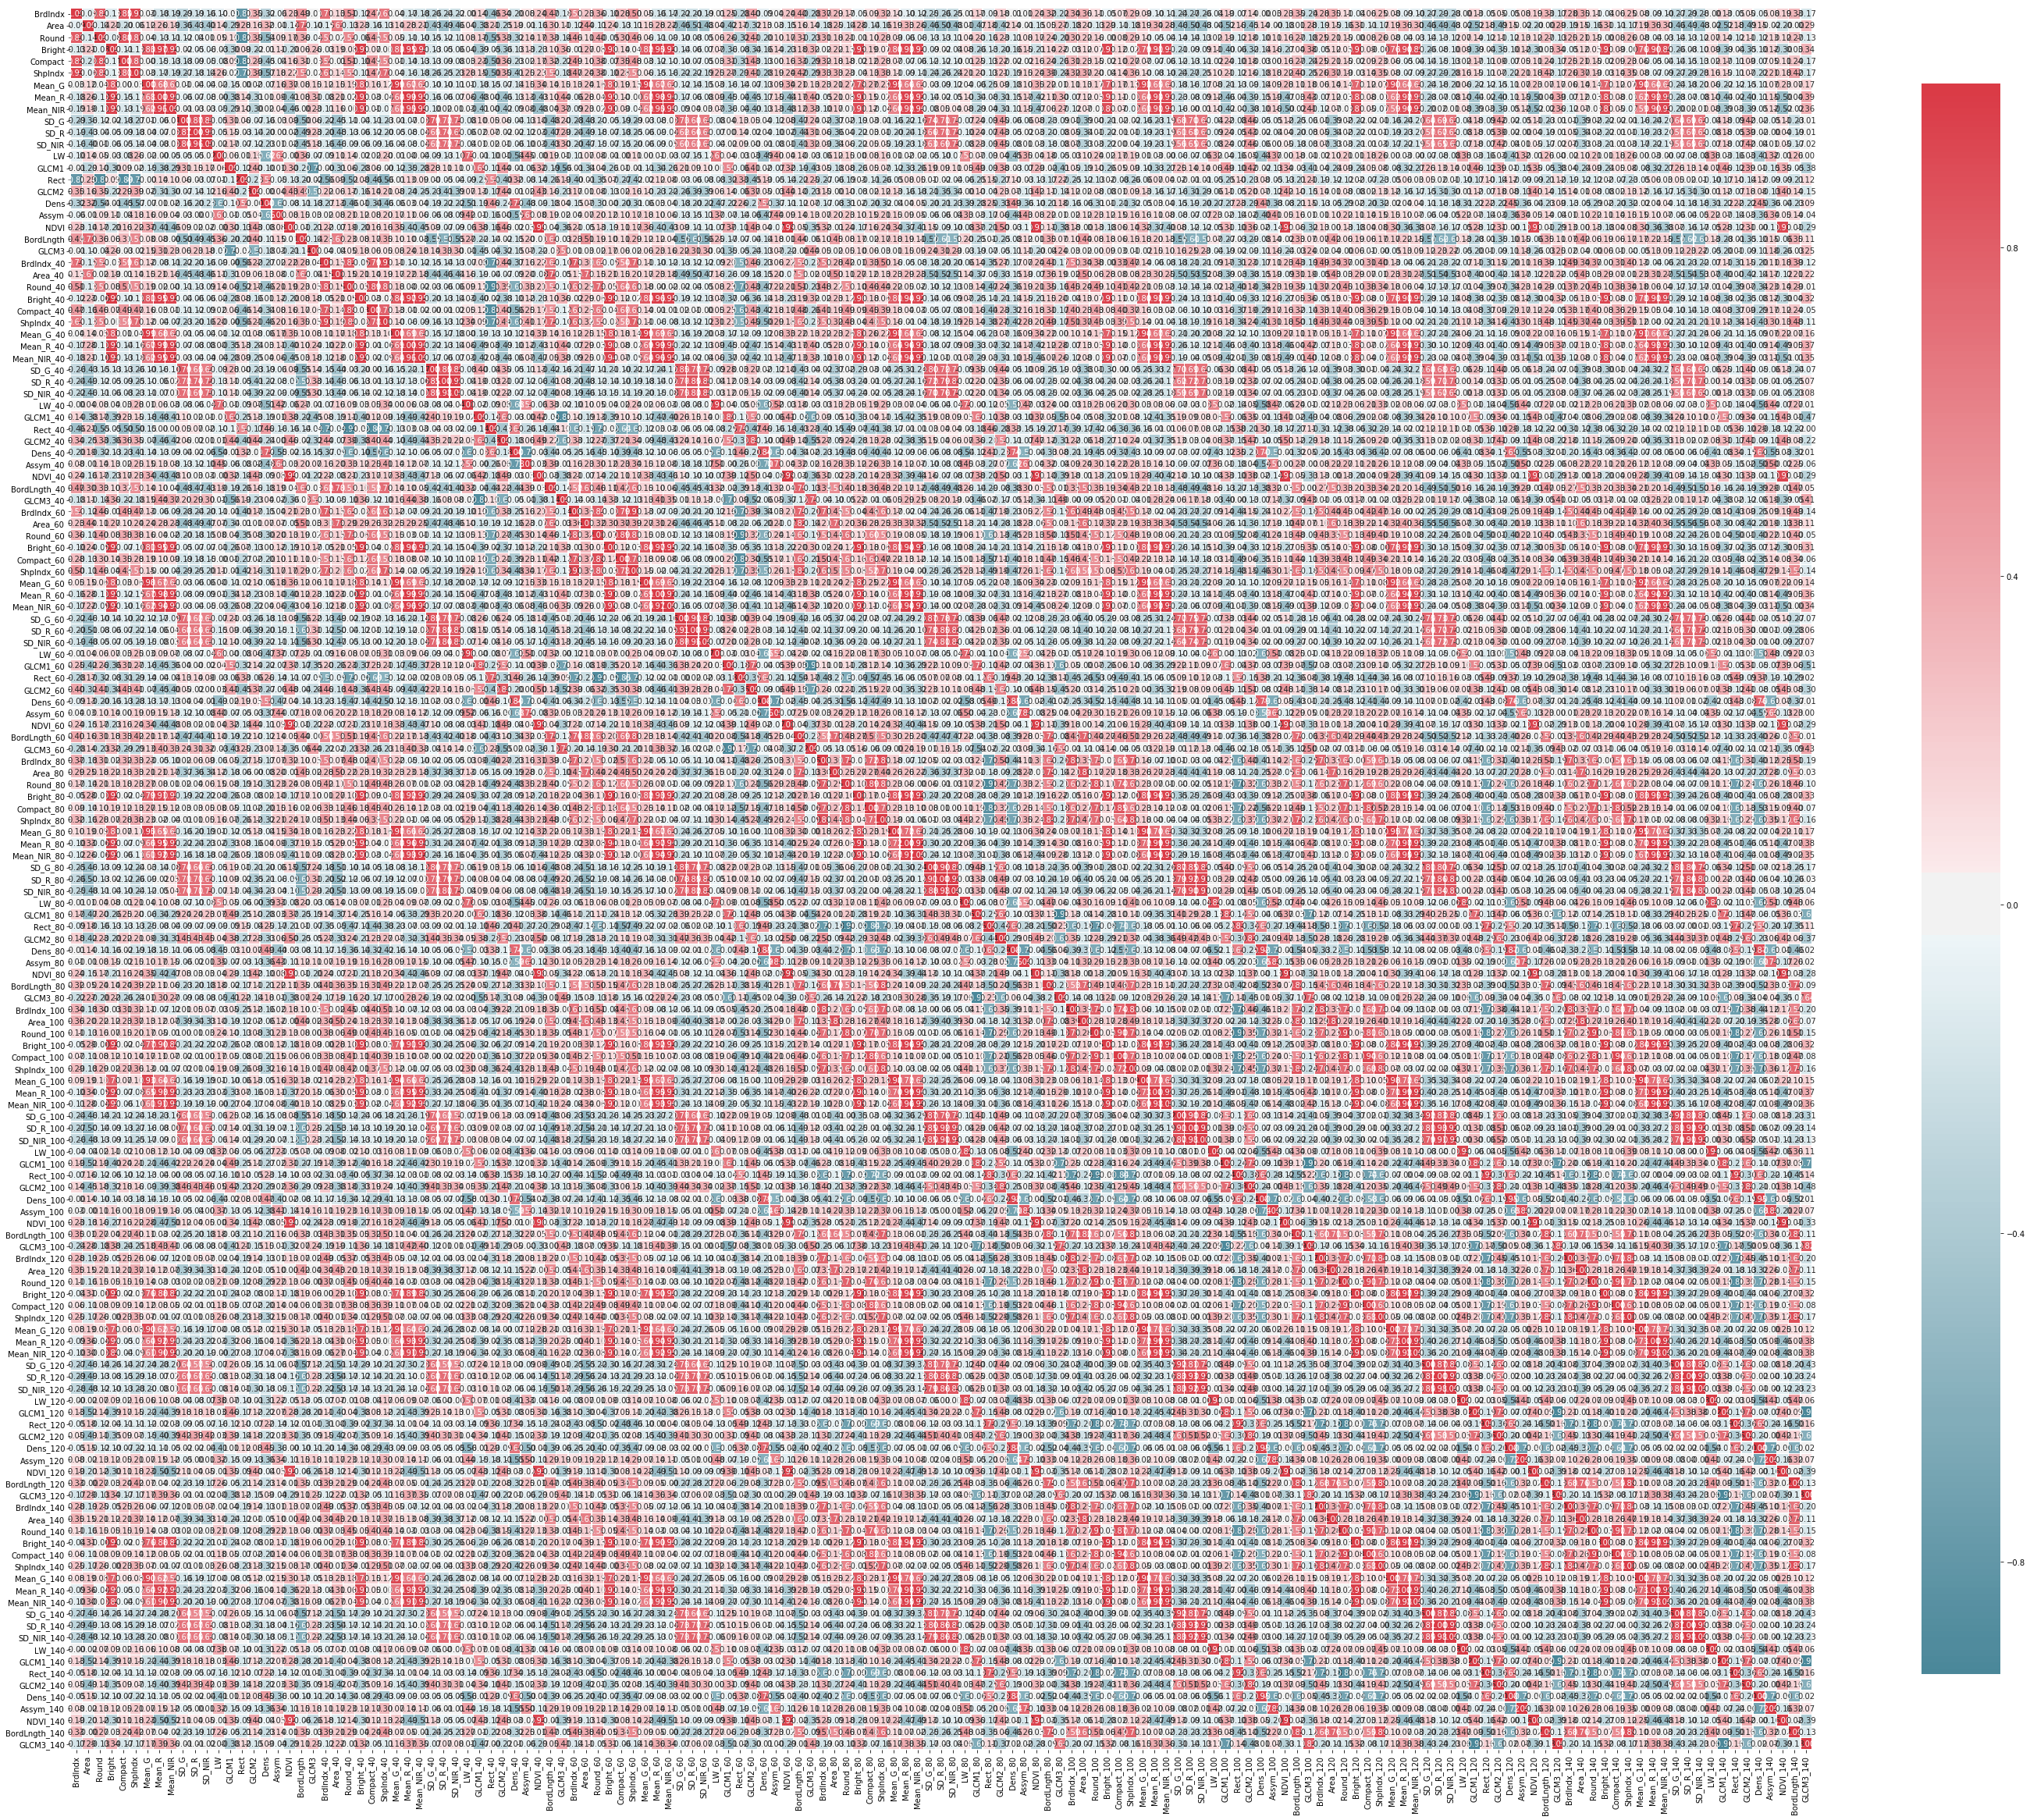

In [10]:
import matplotlib.pyplot as plt
def corr_heatmap(v):
    correlations = train[v].corr()
    # Create color map ranging between two colors
    cmap = sn.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(50,50))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
v = meta['varname']
corr_heatmap(v)

## 1.3 select feature
remove one feature that have high correlation with another

In [11]:
def find_correlation(data, threshold=0.9, remove_negative=True):
    corr_mat = data.corr()
    if remove_negative:
        corr_mat = np.abs(corr_mat)
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][corr_mat[col] > threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [12]:
dropset = set(find_correlation(train))

In [13]:
train = train.drop(dropset, axis=1)
test = test.drop(dropset, axis=1)

In [14]:
train.shape
test.shape

(507, 77)

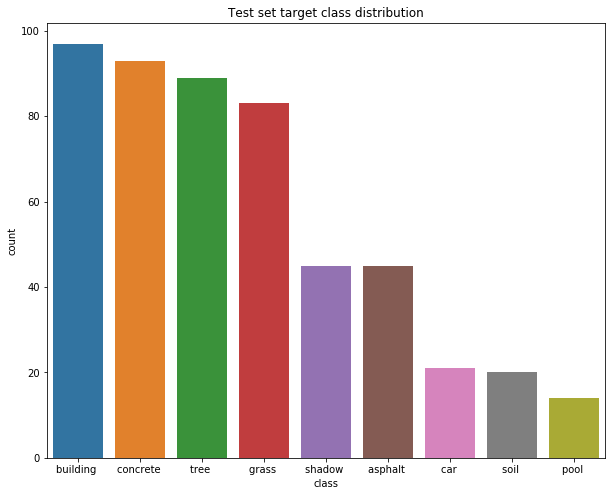

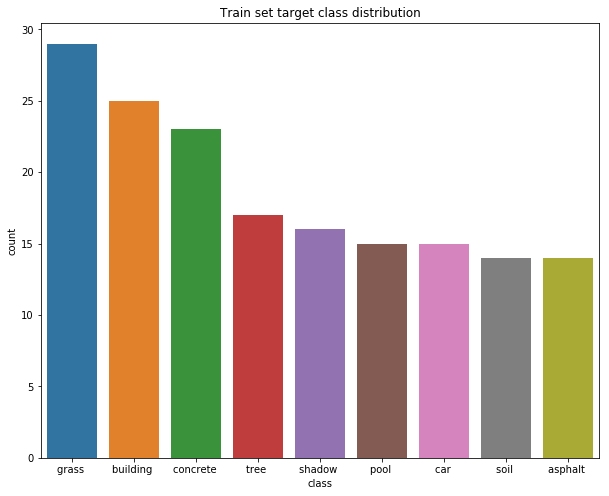

In [15]:
from seaborn import axes_style
 
with axes_style({'grid.color': "red"}):
    f, ax = plt.subplots(figsize=(10, 8))
    sns.countplot(x="class", data=test,
                  order = test['class'].value_counts().index)
    plt.title('Test set target class distribution')
plt.show()
 
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x="class", data=train,
              order = train['class'].value_counts().index)
plt.title('Train set target class distribution')
plt.show()

## 1.4 convert object to number

In [16]:
# convert object of class to normalize labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['class'] = le.fit_transform(train['class'])
test['class'] = le.fit_transform(test['class'])
leclass = le.classes_
print(leclass)

['asphalt ' 'building ' 'car ' 'concrete ' 'grass ' 'pool ' 'shadow '
 'soil ' 'tree ']


## 1.5 Cross-validation

In [17]:
y_train = train['class']
x_train = train.iloc[:,1:]
y_test = test['class']
x_test = test.iloc[:,1:]

## 2.1 model

In [229]:
from sklearn.grid_search import GridSearchCV
rfc = RandomForestClassifier(random_state=0)
param_grid = { 'n_estimators' : [5,10,20,30,50]}

In [230]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid = param_grid)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

{'n_estimators': 50}

{'n_estimators': 50}

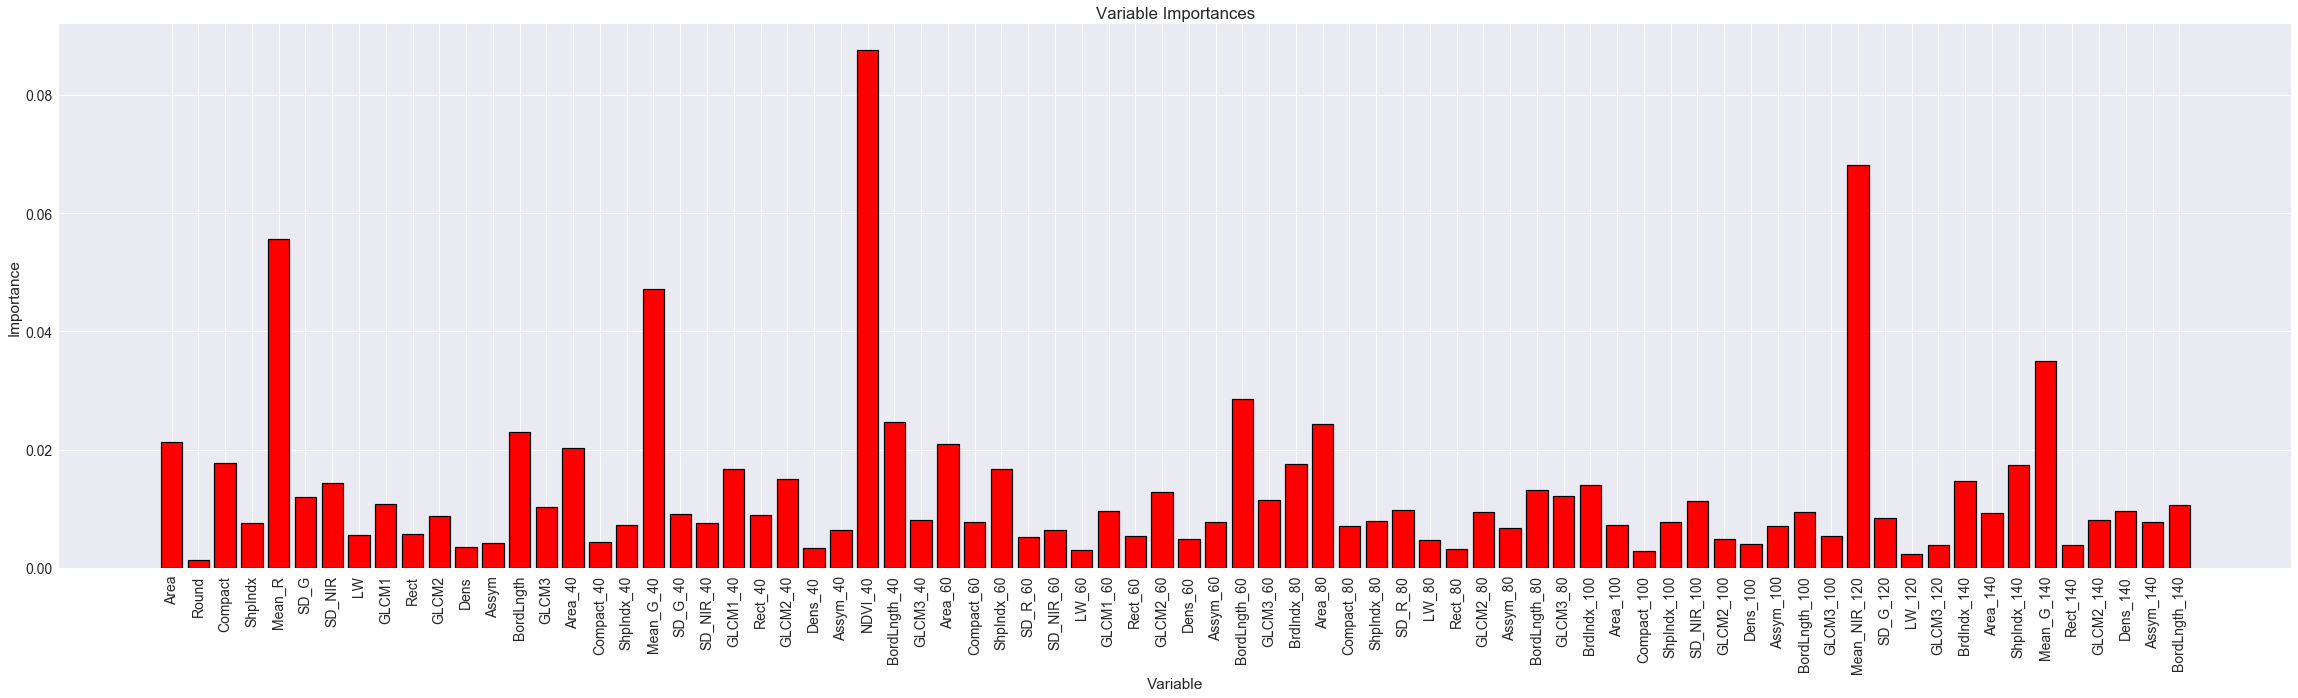

Mean squared error: 0.27
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       0.96      0.96      0.96        25
          2       1.00      1.00      1.00        15
          3       0.96      0.96      0.96        23
          4       0.97      0.97      0.97        29
          5       1.00      1.00      1.00        15
          6       1.00      1.00      1.00        16
          7       1.00      0.93      0.96        14
          8       0.94      1.00      0.97        17

avg / total       0.98      0.98      0.98       168

Accuracy of Random Forest apply to train set :  0.9761904761904762


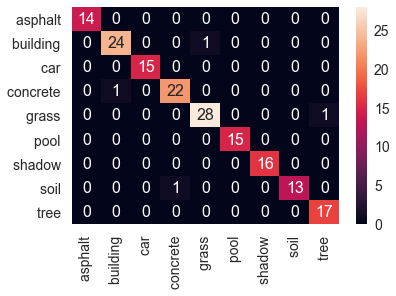

In [223]:
# Random Forest Mode
# Instantiate model with 50 decision trees
rf = RandomForestClassifier(
    n_estimators=50,
    random_state=0
)

cv = KFold(n_splits=10, random_state=0, shuffle=True)
    
for (train, test), i in zip(cv.split(x_train, y_train), range(10)):
    rf.fit(x_train.iloc[train], y_train.iloc[train])

# Get numerical feature importances

importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(x_train, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# print(feature_importances)

feature_list = list(x_train.columns)


x_values = list(range(len(importances)))

plt.figure(figsize=(40,10))
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()

important_indices=[x[0] for x in feature_importances[:25]]

y_rf_pred_train = rf.predict(x_train)
errors = abs(y_rf_pred_train - y_train)
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_rf_pred_train))
matrix = confusion_matrix(y_train, y_rf_pred_train)
df_cm = pd.DataFrame(matrix, leclass, leclass)
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

report = classification_report(y_train, y_rf_pred_train)
print(report)
acc_rf1 = accuracy_score(y_train, y_rf_pred_train)
print('Accuracy of Random Forest apply to train set : ',acc_rf1)

Mean squared error: 2.99
             precision    recall  f1-score   support

          0       0.86      0.82      0.84        45
          1       0.91      0.70      0.79        97
          2       0.82      0.86      0.84        21
          3       0.76      0.87      0.81        93
          4       0.82      0.82      0.82        83
          5       0.55      0.86      0.67        14
          6       0.70      0.73      0.72        45
          7       0.55      0.60      0.57        20
          8       0.84      0.81      0.82        89

avg / total       0.80      0.79      0.79       507

Accuracy of Random Forest apply to test set :  0.7909270216962525


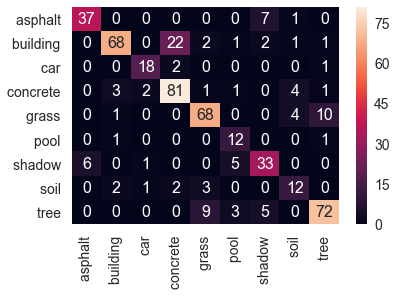

In [224]:
# the score of test set
y_rf_pred = rf.predict(x_test)

errors = abs(y_rf_pred - y_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_rf_pred))
matrix = confusion_matrix(y_test, y_rf_pred)
df_cm = pd.DataFrame(matrix, leclass, leclass)
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
report = classification_report(y_test, y_rf_pred)
print(report)
acc_rf2 = accuracy_score(y_test, y_rf_pred)
print('Accuracy of Random Forest apply to test set : ',acc_rf2)

Mean squared error: 0.32
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       1.00      0.92      0.96        25
          2       1.00      0.93      0.97        15
          3       0.92      1.00      0.96        23
          4       0.97      1.00      0.98        29
          5       1.00      1.00      1.00        15
          6       1.00      1.00      1.00        16
          7       0.93      0.93      0.93        14
          8       1.00      1.00      1.00        17

avg / total       0.98      0.98      0.98       168

Accuracy of Random Forest(only importance feature) apply to train set :  0.9761904761904762


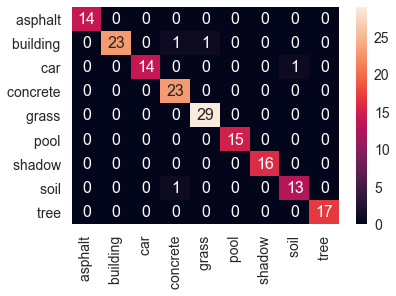

In [221]:
### only use importance feature
rf_if = RandomForestClassifier(
    n_estimators=50,
    random_state=0
)
x_if_train = x_train[important_indices]
x_if_test = x_test[important_indices]

cv = KFold(n_splits=10, random_state=0, shuffle=True)
    
for (train, test), i in zip(cv.split(x_if_train, y_train), range(10)):
    rf_if.fit(x_if_train.iloc[train], y_train.iloc[train])



y_if_pred_train= rf_if.predict(x_if_train)
errors = abs(y_if_pred_train - y_train)
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_if_pred_train))
matrix = confusion_matrix(y_train, y_if_pred_train)
df_cm = pd.DataFrame(matrix, leclass, leclass)
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
report = classification_report(y_train, y_if_pred_train)
print(report)
acc_if1 = accuracy_score(y_train, y_if_pred_train)
print('Accuracy of Random Forest(only importance feature) apply to train set : ',acc_if1)

Mean squared error: 2.42
             precision    recall  f1-score   support

          0       0.89      0.87      0.88        45
          1       0.90      0.63      0.74        97
          2       0.69      0.86      0.77        21
          3       0.73      0.85      0.79        93
          4       0.79      0.86      0.82        83
          5       0.69      0.79      0.73        14
          6       0.79      0.84      0.82        45
          7       0.59      0.80      0.68        20
          8       0.88      0.79      0.83        89

avg / total       0.81      0.79      0.79       507

Accuracy of Random Forest(only importance feature) apply to test set :  0.7948717948717948


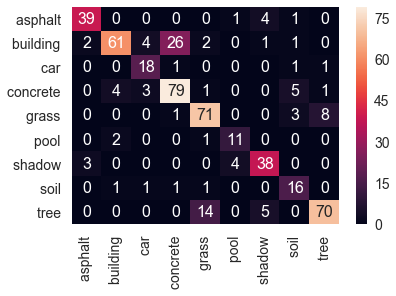

In [222]:

y_if_pred= rf_if.predict(x_if_test)

errors = abs(y_rf_pred - y_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_if_pred))
matrix = confusion_matrix(y_test, y_if_pred)
df_cm = pd.DataFrame(matrix, leclass, leclass)
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
report = classification_report(y_test, y_if_pred)
print(report)
acc_if2 = accuracy_score(y_test, y_if_pred)
print('Accuracy of Random Forest(only importance feature) apply to test set : ',acc_if2)

Mean squared error: 2.27
             precision    recall  f1-score   support

          0       0.93      0.93      0.93        14
          1       0.75      0.84      0.79        25
          2       1.00      0.93      0.97        15
          3       0.90      0.78      0.84        23
          4       0.87      0.69      0.77        29
          5       0.88      0.93      0.90        15
          6       0.93      0.88      0.90        16
          7       0.81      0.93      0.87        14
          8       0.68      0.88      0.77        17

avg / total       0.86      0.85      0.85       168

Accuracy of Naive Bayes apply to train set :  0.8452380952380952


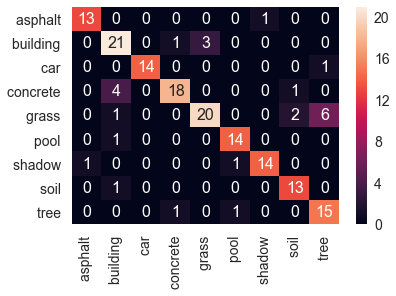

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
x_nb_train = x_train[important_indices]
x_nb_test = x_test[important_indices]


cv = KFold(n_splits=10, random_state=0, shuffle=True)
    
for (train, test), i in zip(cv.split(x_nb_train, y_train), range(10)):
    gnb.fit(x_nb_train.iloc[train], y_train.iloc[train])


y_gnb_pred_train = gnb.predict(x_nb_train)
gnb_errors = abs(y_gnb_pred_train - y_train)
np.sum(gnb_errors)
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_gnb_pred_train))
matrix = confusion_matrix(y_train, y_gnb_pred_train)
df_cm = pd.DataFrame(matrix, leclass, leclass)
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
report = classification_report(y_train, y_gnb_pred_train)
print(report)
acc_nb1 = accuracy_score(y_train, y_gnb_pred_train)
print('Accuracy of Naive Bayes apply to train set : ',acc_nb1)

Mean squared error: 5.24
             precision    recall  f1-score   support

          0       0.88      0.64      0.74        45
          1       0.88      0.71      0.79        97
          2       0.81      0.81      0.81        21
          3       0.82      0.74      0.78        93
          4       0.71      0.55      0.62        83
          5       0.50      0.71      0.59        14
          6       0.80      0.71      0.75        45
          7       0.17      0.30      0.21        20
          8       0.62      0.90      0.73        89

avg / total       0.75      0.71      0.71       507

Accuracy of Naive Bayes apply to test set :  0.7061143984220908


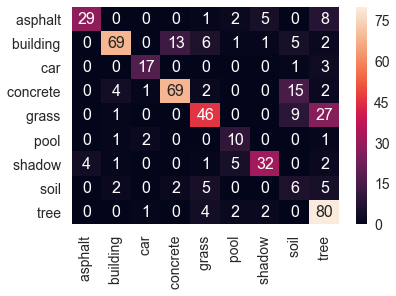

In [19]:
y_gnb_pred = gnb.predict(x_nb_test)
gnb_errors = abs(y_gnb_pred - y_test)
np.sum(gnb_errors)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_gnb_pred))
matrix = confusion_matrix(y_test, y_gnb_pred)
df_cm = pd.DataFrame(matrix, leclass, leclass)
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
report = classification_report(y_test, y_gnb_pred)
print(report)
acc_nb2 = accuracy_score(y_test, y_gnb_pred)
print('Accuracy of Naive Bayes apply to test set : ',acc_nb2)